In [1]:
from ipynb.fs.full.HT_A4_Formulas import tf,Nu_x1,Nu_x2, Nu_L, Nu_liq_metal, Nu_x, St_x1, St_x2, Nu_L2, Nu_mu, delbyx_laminar, delbyx_turb, cf_laminar, cf_turb, cf_avg,f2c
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np
from matplotlib import pyplot as plt
import sys
import random


In [2]:
#importing data from appendix A4
nh3 = pd.read_excel('Appendix_A4.xlsx',sheet_name = 0)
co2 = pd.read_excel('Appendix_A4.xlsx',sheet_name = 1)
so2 = pd.read_excel('Appendix_A4.xlsx',sheet_name = 2)
freon = pd.read_excel('Appendix_A4.xlsx',sheet_name = 3)
glycerin = pd.read_excel('Appendix_A4.xlsx',sheet_name = 4)
eglycol = pd.read_excel('Appendix_A4.xlsx',sheet_name = 5)
engine_oil = pd.read_excel('Appendix_A4.xlsx',sheet_name = 6)
hg = pd.read_excel('Appendix_A4.xlsx',sheet_name = 7)
sat_water = pd.read_excel('Appendix_A9.xlsx',sheet_name = 0)

In [3]:
#A5
air_1atm = pd.read_excel('Appendix_A5.xlsx')
#A6
he = pd.read_excel('Appendix_A6.xlsx',sheet_name = 0)
h2 = pd.read_excel('Appendix_A6.xlsx',sheet_name = 1)
o2 = pd.read_excel('Appendix_A6.xlsx',sheet_name = 2)
n2 = pd.read_excel('Appendix_A6.xlsx',sheet_name = 3)
co2 = pd.read_excel('Appendix_A6.xlsx',sheet_name = 4)
nh4 = pd.read_excel('Appendix_A6.xlsx',sheet_name = 5)
vap = pd.read_excel('Appendix_A6.xlsx',sheet_name = 6)

In [4]:
#INSTRUCTIONS 
#Linear interpolation for the data
#for gases dont interpolate for nu take it as mu/rho !
#plot velocity profile
#plot theta vs y 
#plot local heat transfer vs x

#### 5-13 Calculate the ratio of thermal-boundary-layer thickness to hydrodynamic-boundary- layer thickness for the following fluids: air at 1 atm and 20$^{\circ}$C, water at 20$^{\circ}$C, helium at 1 atm and 20$^{\circ}$C, liquid ammonia at 20$^{\circ}$C, glycerine at 20$^{\circ}$C.


In [5]:
def tbl_hbl (Pr):
    return 1/(1.026*(Pr)**(1/3))

In [6]:
#Linear interpolation for the data
#for gases dont interpolate for nu take it as mu/rho !
T1 = air_1atm['T']
#dependent variable
Pr1 = air_1atm['Pr']

#f1 = interp1d(np.array(T1), np.array(Pr1),kind='linear')
f1 = interp1d(np.array(T1), np.array(Pr1),kind='quadratic')
Pr_ac1 = f1(493.15)   #temp@ which Pr has to be found
#print(f1(493.15),f2(493.15))
t_h1 = tbl_hbl(Pr_ac1)

#water
Tw = sat_water['C']
Prw = sat_water['Pr']
fw = interp1d(np.array(Tw), np.array(Prw),kind='linear')
Prw1 = fw(20)
t_hw = tbl_hbl(Prw1)

#helium 
T2 = he['T']
Pr2 = he['Pr']
f1 = interp1d(np.array(T2), np.array(Pr2),kind='linear')
Pr_ac2 = f1(493.15) 
t_h2 = tbl_hbl(Pr_ac2)

#liquid ammonia
Pr_3 = nh3.at[7,'Pr']
t_h3 = tbl_hbl(Pr_3)

#glycerin
Pr_4 = glycerin.at[2,'Pr']
t_h4 = tbl_hbl(Pr_4)

table = {'fluids' :['Air','Water','He', 'NH3','Glycerine'],
         'A' : [t_h1, t_hw, t_h2, t_h3,t_h4]}
df = pd.DataFrame(table)
print(df)


      fluids         A
0        Air  1.108255
1      Water  0.509511
2         He  1.087448
3        NH3  0.771026
4  Glycerine  0.041997


#### 5-21 Nitrogen at 2atm and 500K flows across a 40-cm-square plate at a velocity of 25m/s. Calculate the cooling required to maintain the plate surface at a constant temperature of 300 K.

Tf = 400.0
ν = 1.287e-05
k = 0.03335
Prandtl no = 0.691
Reynolds no = 7.77e+05
h = 76.42
The cooling required is 2445.60 W
0.2574


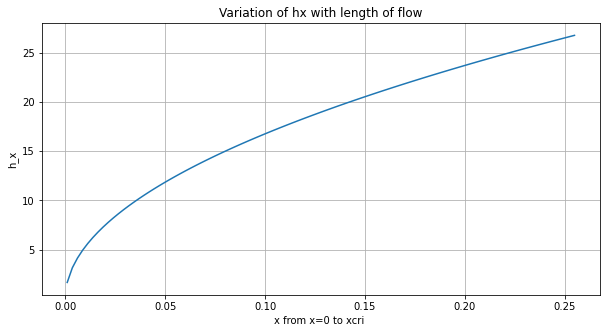

In [7]:
Tw = 300
Tinf = 500
Tf = tf(Tw,Tinf)
l = 0.4
v = 25
print("Tf = {}".format(Tf))
nu = (n2.at[2, 'nu'])/2
print("\u03BD = {}".format(nu))
k = (n2.at[2,'k'])
print("k = {}".format(k))
Pr = (n2.at[2,'Pr'])
rho = (n2.at[2,'rho'])*2
cp = (n2.at[2,'Cp'])*1000
Re = l*v/nu
print("Prandtl no = {}".format(Pr))
print("Reynolds no = {:.2e}".format(Re))
Nu = Nu_L2(Pr,Re)
h = k*Nu/l
print("h = {:.2f}".format(h))
q = h*(l**2)*(Tinf-Tw)
print("The cooling required is {:.2f} W".format(q))

xcri = 5e5*nu/v

#hx vs x
print(xcri)
x = np.linspace(0.001,xcri,100,endpoint=False)
Rex = x*v/nu
h_xl = 0.332*k*(Pr**(1/3))*(Rex**0.5)/xcri

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.xlabel('x from x=0 to xcri ')
plt.ylabel('h_x')
plt.title('Variation of hx with length of flow')
plt.grid()
plt.plot(x, h_xl)

plt.show()


#### 5.22 Plot the heat-transfer coefficient versus length for flow over a 1-m-long flat plate under the following conditions: (e) helium at 20 lb/in2 abs, 80$^{\circ}$F, ${u_\infty}$ = 10 ft/s.

ρ = 0.162
μ = 2.015e-05
ν = 1.246e-04
Reynolds no = 24466.50167841928
k = 0.15
Prandtl no = 0.704


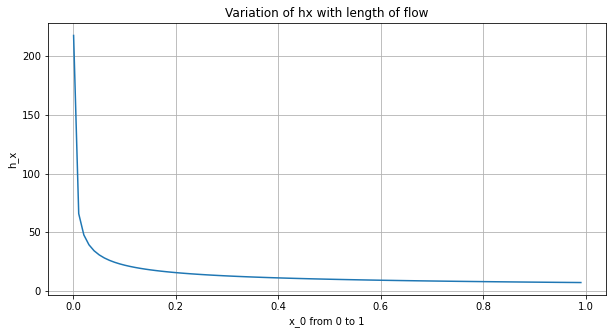

In [8]:
u = 10*0.3048
Tg = 26.6667+273
l = 1
R = 2077.1
p = 80*6894.76
T = he['T']
rho = he['rho']
f1 = interp1d(T, rho,kind='quadratic')
#from interpolated data we find rho, mu and then calc for nu
rho1 = f1(Tg)
f2 = interp1d(he['T'],he['mu'],kind='quadratic')
mu1 = f2(Tg)
f3 = interp1d(he['T'],he['k'],kind='linear')
k = f3(Tg)
f4 = interp1d(he['T'],he['Pr'],kind='linear')
Pr = f4(Tg)
nu = mu1/rho1
Re = u*l/nu
print("\u03C1 = {:.3f}".format(rho1))
print("\u03BC = {:.3e}".format(mu1))
print("\u03BD = {:.3e}".format(nu))
print("Reynolds no = {}".format(Re))
print("k = {:.2f}".format(k))
print("Prandtl no = {:.3f}".format(Pr))

x = np.linspace(0.001,l,100,endpoint=False)
Rex = x*u/nu
h_x = 0.332*k*(Pr**(1/3))*(Rex**0.5)/x
# naming the x and y axis
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.xlabel('x_0 from 0 to 1')
plt.ylabel('h_x')
plt.title('Variation of hx with length of flow')
plt.grid()
plt.plot(x,h_x)
plt.show()

#### 5.26 Air at a pressure of 200 kPa and free-stream temperature of 27$^{\circ}$C flows over a square flat plate at a velocity of 30 m/s. The Reynolds number is $10^6$ at the edge of the plate. Calculate the heat transfer for an isothermal plate maintained at 57$^{\circ}$C.

In [9]:
tw = 57.0
tinf = 27.0
Tf = tf(tw,tinf) + 273
P = 200/101.325
u = 30
Re = 1e6
#interpolations
f1 = interp1d(air_1atm['T'],air_1atm['nu'],kind='quadratic')
nu = f1(Tf)/P
f2 = interp1d(air_1atm['T'],air_1atm['k'],kind='quadratic')
k = f2(Tf)
f3 = interp1d(air_1atm['T'],air_1atm['Pr'],kind='linear')
Pr = f3(Tf)
f4 = interp1d(air_1atm['T'],air_1atm['mu'],kind='linear')
mu = f4(Tf)
f5 = interp1d(air_1atm['T'],air_1atm['rho'],kind='quadratic')
rho = f5(Tf)
f6 = interp1d(air_1atm['T'],air_1atm['Cp'],kind='quadratic')
cp = f6(Tf)*1000

l = Re*nu/u
Nus = Nu_L2(Pr,Re)
h = k*Nus/l
q = h*(l**2)*(tw-tinf)
print("Tf = {}".format(Tf))
print("k = {:.3f}".format(k))
print("\u03BD = {:.3e}".format(nu))
print("Reynolds no. = {:.3e}".format(Re))
print("Prandtl no. = {}".format(Pr))
print("Nusselt no. = {:.2f}".format(Nus))
print("h = {:.2f}".format(h))
print("Heat lost from plate= {:.2f} W".format(q))


Tf = 315.0
k = 0.027
ν = 8.685e-06
Reynolds no. = 1.000e+06
Prandtl no. = 0.7047
Nusselt no. = 1302.39
h = 123.25
Heat lost from plate= 309.86 W


#### 5.33 Calculate the flow velocity necessary to produce a Reynolds number of $10^7$ for flow across a 1-m-square plate with the following fluids: (e) helium at 20$^{\circ}$C.


In [10]:
Re = 1e7
l = 1
T1 = 20+273
f = interp1d(he['T'],he['nu'],kind='linear')
nu = f(T1)
v = Re*nu/l
print("velocity required = {:.3f} m/s".format(v))

velocity required = 1222.369 m/s


#### 5.37 Air at 0.5 atm pressure and 27$^{\circ}$C flows across a 34-cm-square plate at a velocity of 20 m/s. The plate temperature is maintained at 127$^{\circ}$C. Calculate the heat lost by the plate.

Tf = 350.0
k = 0.03003
ν = 4.152e-05
Reynolds no. = 1.638e+05
Prandtl no. = 0.697
Nusselt no. = 238.25
h = 21.04
Heat lost from plate= 243.26 W


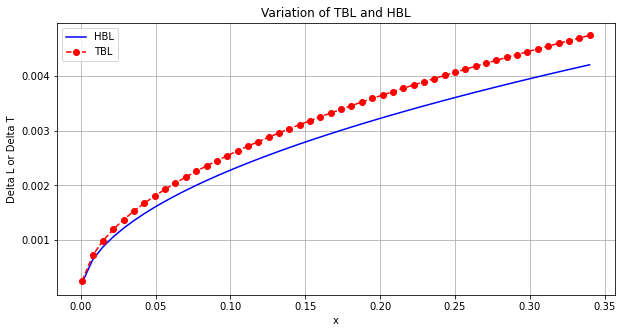

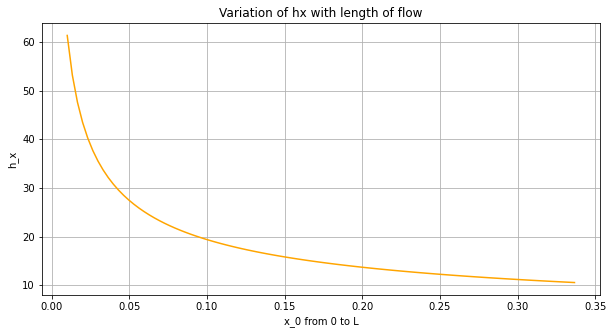

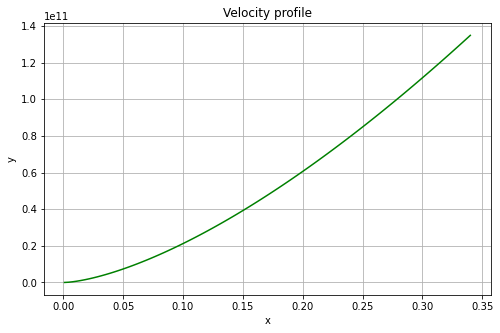

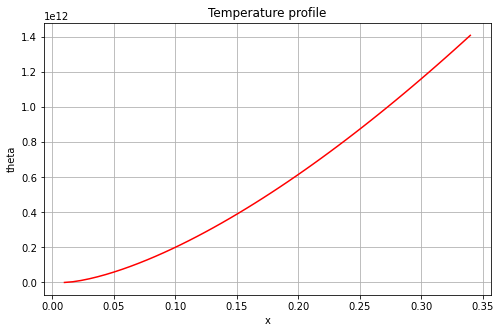

In [11]:
u = 20
l = 34*1e-2
t_inf = 27+273
tw = 127+273
P = 0.5
Tf = tf(tw,t_inf)
nu = (air_1atm.at[5,'nu'])/P
k = (air_1atm.at[5,'k'])
Pr = (air_1atm.at[5,'Pr'])
Re = u*l/nu
Nu = Nu_L(Pr,Re)
h = k*Nu/l
q = h*(l**2)*(tw-t_inf)
print("Tf = {}".format(Tf))
print("k = {}".format(k))
print("\u03BD = {}".format(nu))
print("Reynolds no. = {:.3e}".format(Re))
print("Prandtl no. = {}".format(Pr))
print("Nusselt no. = {:.2f}".format(Nu))
print("h = {:.2f}".format(h))
print("Heat lost from plate= {:.2f} W".format(q))

#plot of tbl and hbl
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
x = np.linspace(0.001,l,50)
rex = u*x/nu
delh = 5*x/(rex**(0.5))
delt = delh/(Pr**(1/3))
plt.plot(x,delh,color ='blue',label = 'HBL')
plt.plot(x,delt,color = 'red',linestyle = 'dashed',marker='o',label = 'TBL')
plt.xlabel("x")
plt.ylabel("Delta L or Delta T")
plt.title("Variation of TBL and HBL")
plt.grid()
plt.legend()
plt.show()

#plot of hx vs x
x = np.linspace(0.01,l,100,endpoint=False)
Rex = x*u/nu
h_x = 0.332*k*(Pr**(1/3))*(Rex**0.5)/x
# naming the x and y axis
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.xlabel('x_0 from 0 to L')
plt.ylabel('h_x')
plt.title('Variation of hx with length of flow')
plt.grid()
plt.plot(x,h_x,color = 'orange')
plt.show()

#velocity profile
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
xv = np.linspace(0.001,l,100)
rv = u*xv/nu
delh = 5*xv/(rv**(0.5))
y = np.linspace(0.01,10,100)
ux = -1*((3/2)*(y/delh) - 0.5*((y/delh)**3))*u
plt.plot(xv,ux,color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity profile')
plt.grid()
plt.show()

#temperature profile
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
yt = np.linspace(0.01,10,50)
theta = -1*t_inf*(((3/2)*yt/delt) - (1/2)*(yt/delt)**3)
xt = np.linspace(0.01,0.34,50)
plt.plot(xt,theta ,color='red')
plt.xlabel('x')
plt.ylabel('theta')
plt.title('Temperature profile')
plt.grid()
plt.show()


#### 5.43 A 10-cm-square plate has an electric heater installed that produces a constant heat flux. Water at 10$^{\circ}$C flows across the plate at a velocity of 3 m/s. What is the total heat which can be dissipated if the plate temperature is not to exceed 80$^{\circ}$C?

Tf = 45.0
k = 0.6391025179856116
ν = 4.152e-05
Reynolds no. = 4.960e+05
Prandtl no. = 3.9198561151079137
Nusselt no. = 503.03
h = 3214.88
Heat lost from plate = 2250.42 W


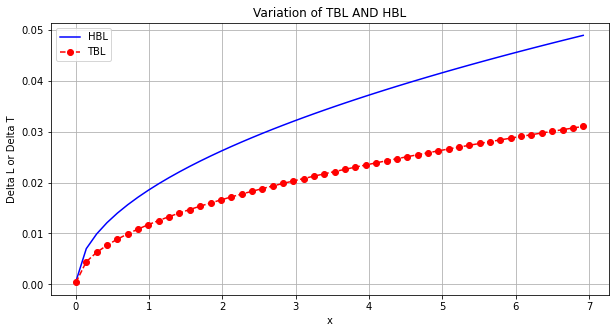

In [12]:
u = 3
l = 0.1
tw = 80
t_inf = 10
Tf = tf(tw,t_inf)
f1 = interp1d(sat_water['C'],sat_water['rho'],kind='quadratic')
rho = f1(Tf)
f2 = interp1d(sat_water['C'],sat_water['mu'],kind='quadratic')
mu = f2(Tf)
f3 = interp1d(sat_water['C'],sat_water['k'],kind='linear')
k = f3(Tf)
f4 = interp1d(sat_water['C'],sat_water['Pr'],kind='linear')
Pr = f4(Tf)
Re = rho*u*l/mu
Nus = Nu_x2(Pr,Re)
h = k*Nus/l
q = h*(l**2)*(tw-t_inf)
print("Tf = {}".format(Tf))
print("k = {}".format(k))
print("\u03BD = {}".format(nu))
print("Reynolds no. = {:.3e}".format(Re))
print("Prandtl no. = {}".format(Pr))
print("Nusselt no. = {:.2f}".format(Nus))
print("h = {:.2f}".format(h))
print("Heat lost from plate = {:.2f} W".format(q))

#plot of tbl and hbl
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
xcri = 5e5*nu/u
x = np.linspace(0.001,xcri,50)
rex = u*x/nu
delh = 5*x/(rex**(0.5))
delt = delh/(Pr**(1/3))
plt.plot(x,delh,color ='blue',label = 'HBL')
plt.plot(x,delt,color = 'red',linestyle = 'dashed',marker='o',label = 'TBL')
plt.xlabel("x")
plt.ylabel("Delta L or Delta T")
plt.title("Variation of TBL AND HBL")
plt.grid()
plt.legend()
plt.show()

#### 5.51 Nitrogen at 1 atm and 300 K blows across a horizontal flat plate at a velocity of 33 m/s. The plate has a constant surface temperature of 400 K. Calculate the heat lost by the plate if the plate dimensions are 60 cm by 30 cm with the longer dimension in the direction of flow. Express in watts.


In [13]:
tw = 400
t_inf = 300
u = 33
l = 0.6 #longer direction in heat flow
b = 0.3
Tf = tf(tw,t_inf) 
f1 = interp1d(n2['T'],n2['nu'],kind='linear')
nu = f1(Tf)
f2 = interp1d(n2['T'],n2['k'],kind='quadratic')
k = f2(Tf)
f3 = interp1d(n2['T'],n2['Pr'],kind='cubic')
Pr = f3(Tf)
Re = u*l/nu
Nus = Nu_L2(Pr,Re)
h = k*Nus/l
q = h*l*b*(tw-t_inf)
print("Tf = {}".format(Tf))
print("k = {:.3f}".format(k))
print("\u03BD = {:.3e}".format(nu))
print("Reynolds no. = {:.3e}".format(Re))
print("Prandtl no. = {:.2f}".format(Pr))
print("Nusselt no. = {:.2f}".format(Nus))
print("h = {:.2f}".format(h))
print("Heat lost from plate= {:.2f} W".format(q))

Tf = 350.0
k = 0.030
ν = 2.069e-05
Reynolds no. = 9.572e+05
Prandtl no. = 0.70
Nusselt no. = 1228.33
h = 61.15
Heat lost from plate= 1100.63 W


#### 5.58 Hydrogen at 2 atm and 15$^{\circ}$C flows across a l-m-square flat plate at a velocity of 6 m/s. The plate is maintained at a constant temperature of 139$^{\circ}$C. Calculate the heat lost by the plate.

Tf = 350.0
k = 0.206
ν = 7.095e-05
Reynolds no. = 8.457e+04
Prandtl no. = 0.70
Nusselt no. = 171.20
h = 35.27
Heat lost from flat plate= 4373.21 W


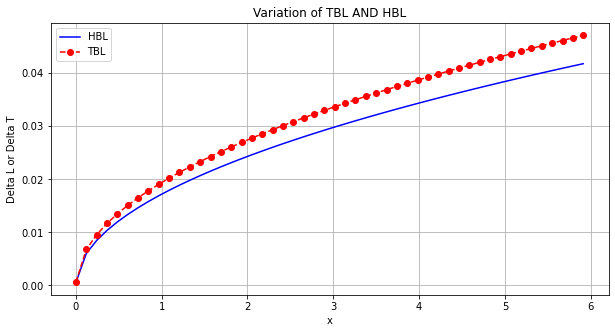

In [14]:
tw = 139
t_inf = 15
l = 1
u = 6
Tf = tf(tw,t_inf) + 273
k = (h2.at[4,'k'])
Pr = (h2.at[4,'Pr'])
nu= h2.at[4,'nu']/2
Re = u*l/nu
Nus = Nu_L(Pr,Re)
h = k*Nus/l
q = h*(l**2)*(tw-t_inf)
print("Tf = {}".format(Tf))
print("k = {:.3f}".format(k))
print("\u03BD = {:.3e}".format(nu))
print("Reynolds no. = {:.3e}".format(Re))
print("Prandtl no. = {:.2f}".format(Pr))
print("Nusselt no. = {:.2f}".format(Nus))
print("h = {:.2f}".format(h))
print("Heat lost from flat plate= {:.2f} W".format(q))

#plot of tbl and hbl
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
xcri = 5e5*nu/u
x = np.linspace(0.001,xcri,50)
rex = u*x/nu
delh = 5*x/(rex**(0.5))
delt = delh/(Pr**(1/3))
plt.plot(x,delh,color ='blue',label = 'HBL')
plt.plot(x,delt,color = 'red',linestyle = 'dashed',marker='o',label = 'TBL')
plt.xlabel("x")
plt.ylabel("Delta L or Delta T")
plt.title("Variation of TBL AND HBL")
plt.grid()
plt.legend()
plt.show()

#### 5.63 Plot $h_x$ versus x for air at 1 atm and 300 K flowing at a velocity of 30 m/s across a flat plate. Take Recrit = 5 × $10^5$ and use semilog plotting paper. Extend the plot to an x value equivalent to Re = $10^9$. Also plot the average heat-transfer coefficient over this same range.

x critical = 0.26 m


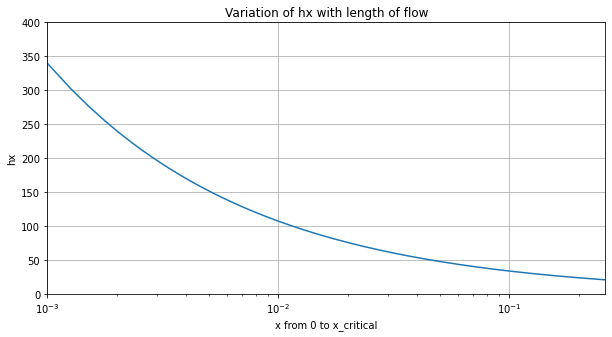

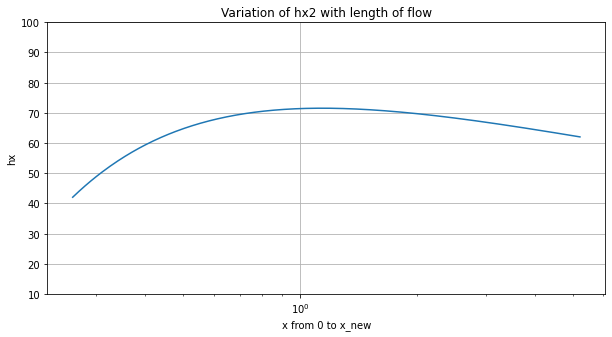

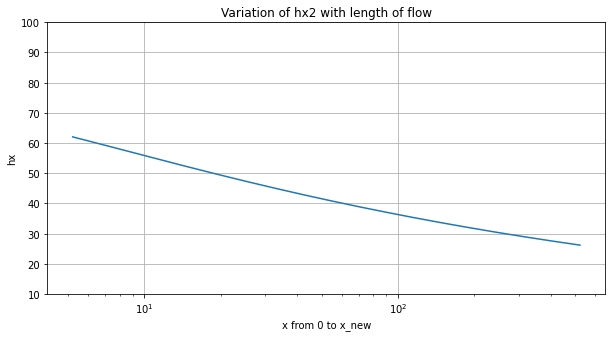

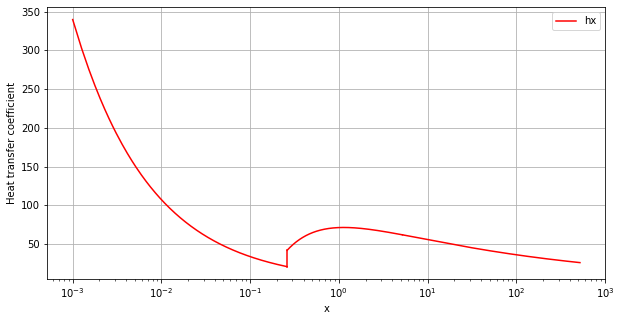

In [15]:
T = 300
u = 30
k = air_1atm.at[4,'k']
Pr = air_1atm.at[4,'Pr']
nu = air_1atm.at[4,'nu']
Rcri = 5e5
xcri = Rcri*nu/u
print("x critical = {:.2f} m".format(xcri))
x = np.linspace(0.001,xcri,1000)
r = x*u/nu
hx = (k*0.332*(r**(0.5))*(Pr**(1/3)))/x
# plot1
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.xlabel('x from 0 to x_critical')
plt.ylabel('hx')
plt.title('Variation of hx with length of flow')

plt.semilogx(x,hx)
plt.xlim([0.001,xcri])
plt.ylim([0,400])
plt.grid()
plt.show()
xx1 = x; hx1 = hx;

#plot2
R2 = 1e7
x2 = R2*nu/u
xnew = np.linspace(xcri,x2,1000)
r2 = xnew*u/nu
hx2 = k*Pr**(1/3)*((0.037*(r2**0.8))-871)/xnew
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.xlabel('x from 0 to x_new')
plt.ylabel('hx')
plt.title('Variation of hx2 with length of flow')
plt.semilogx(xnew,hx2)
plt.ylim([10,100])
plt.grid()
plt.show()
xx2 = xnew; hx2 = hx2;

#plot3
R3 = 1e9
x3 = R3*nu/u
xnew1 = np.linspace(x2,x3,1000)
r3 = xnew1*u/nu
hx3 = k*Pr**(1/3)*((0.037*(r3**0.8))-871)/xnew1
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.xlabel('x from 0 to x_new')
plt.ylabel('hx')
plt.title('Variation of hx2 with length of flow')
plt.semilogx(xnew1,hx3)
plt.ylim([10,100])
plt.grid()
plt.show()
xx3 = xnew1; hx3 = hx3;

#combined plot of 1,2,3

#xc = np.linspace(0.01,x3,1000)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.semilogx(xx1,hx1,color='red')
plt.semilogx([xx1[-1],xx2[0]],[hx1[-1],hx2[0]],color='red')
plt.semilogx(xx2,hx2,color='red')
plt.semilogx(xx3,hx3,color='red',label = 'hx')
plt.legend()
plt.ylabel('Heat transfer coefficient')
plt.xlabel('x')

plt.grid()
plt.show()

#### 5.65 Air flows with a velocity of 6 m/s across a 20-cm-square plate at 50kPa and 300K. An electrical heater is installed in the plate such that it produces a constant heat flux. What is the total heat that can be dissipated if the plate temperature cannot exceed 600 K?

Tf = 450.0
k = 0.037
ν = 6.426e-05
Reynolds no. = 1.867e+04
Prandtl no. = 0.71
Nusselt no. = 55.17
h = 10.23
Total heat dissipated from plate = 122.72 W


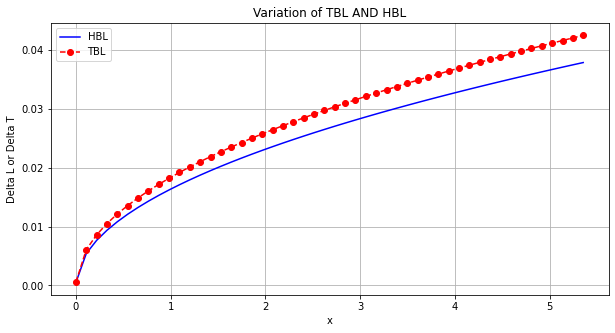

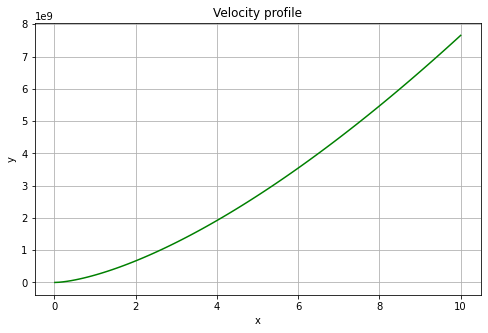

In [16]:
tw = 600
t_inf = 300
Tf = tf(tw,t_inf)
u = 6
l = 0.2
P = 50/101.325
k = air_1atm.at[7,'k']
nu = air_1atm.at[7,'nu']/P
Re = u*l/nu
Nus = Nu_x2(Pr, Re)
h = k*Nus/l
q = h*(l**2)*(tw-t_inf)
print("Tf = {}".format(Tf))
print("k = {:.3f}".format(k))
print("\u03BD = {:.3e}".format(nu))
print("Reynolds no. = {:.3e}".format(Re))
print("Prandtl no. = {:.2f}".format(Pr))
print("Nusselt no. = {:.2f}".format(Nus))
print("h = {:.2f}".format(h))
print("Total heat dissipated from plate = {:.2f} W".format(q))
#plot of tbl and hbl
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
xcri = 5e5*nu/u
x = np.linspace(0.001,xcri,50)
rex = u*x/nu
delh = 5*x/(rex**(0.5))
delt = delh/(Pr**(1/3))
plt.plot(x,delh,color ='blue',label = 'HBL')
plt.plot(x,delt,color = 'red',linestyle = 'dashed',marker='o',label = 'TBL')
plt.xlabel("x")
plt.ylabel("Delta L or Delta T")
plt.title("Variation of TBL AND HBL")
plt.grid()
plt.legend()
plt.show()

#velocity profile
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
xv = np.linspace(0.001,l,100)
rv = u*xv/nu
delh = 5*xv/(rv**(0.5))
y = np.linspace(0.01,10,100)
ux = -1*((3/2)*(y/delh) - 0.5*((y/delh)**3))*u
plt.plot(y,ux,color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity profile')
plt.grid()
plt.show()

#### 5.105 Glycerin at 10$^{\circ}$C flows across a 30-cm-square plate with a velocity of 2 m/s. The plate surface is isothermal at 30$^{\circ}$C. Calculate the heat lost by the plate.

In [17]:
tw = 30
t_inf = 10
Tf = tf(tw,t_inf)
u = 2
l = 0.3
nu = glycerin.at[2,'nu']
k = glycerin.at[2,'k']
Pr = glycerin.at[2,'Pr']
Re = l*u/nu
Nus = 2*Nu_x1(Pr, Re)
h = Nus*k/l
q = h*(l**2)*(tw-t_inf)
print("Tf = {}".format(Tf))
print("k = {:.3f}".format(k))
print("\u03BD = {:.3e}".format(nu))
print("Reynolds no. = {:.3e}".format(Re))
print("Prandtl no. = {:.2f}".format(Pr))
print("Nusselt no. = {:.2f}".format(Nus))
print("h = {:.2f}".format(h))
print("Heat lost from plate = {:.2f} W".format(q))

Tf = 20.0
k = 0.286
ν = 1.180e-03
Reynolds no. = 5.085e+02
Prandtl no. = 12500.00
Nusselt no. = 354.48
h = 337.94
Heat lost from plate = 608.29 W


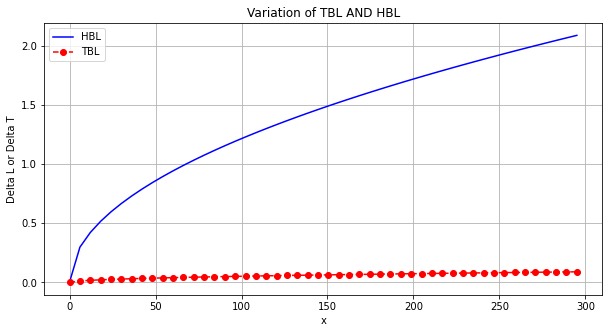

In [18]:
#plot of tbl and hbl
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
xcri = 5e5*nu/u
x = np.linspace(0.001,xcri,50)
rex = u*x/nu
delh = 5*x/(rex**(0.5))
delt = delh/(Pr**(1/3))
plt.plot(x,delh,color ='blue',label = 'HBL')
plt.plot(x,delt,color = 'red',linestyle = 'dashed',marker='o',label = 'TBL')
plt.xlabel("x")
plt.ylabel("Delta L or Delta T")
plt.title("Variation of TBL AND HBL")
plt.grid()
plt.legend()
plt.show()